# 给定B-spline曲面 p=3 U={0,0,0,0,1,2,3,3,4,4,5,5,5,5} 控制点自定义，计算C(3)

# 根据题目知道有n-p-1=14-3-1个控制点

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

In [4]:
# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])

In [49]:
# 生成B样条，k=3表示三阶

spl_x = BSpline(knots, control_points[:,0], k=3)
spl_y = BSpline(knots, control_points[:,1], k=3)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

In [51]:
x = 3
print(spl_y(3))
# C(3)为 0.35

0.35


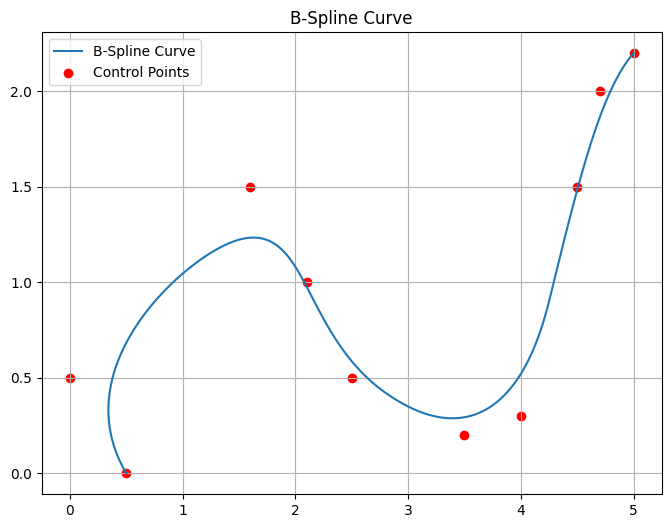

In [54]:
# 绘制出原始曲线便于后续对比
spl = BSpline(knots, control_points, k=3)

# t取值范围（参数化范围）
t = np.linspace(0, 4, 100)

# 绘制B样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Control Points')
plt.title('B-Spline Curve')
plt.legend()
plt.grid(True)
plt.savefig('HW5_1.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 在u=3处分片

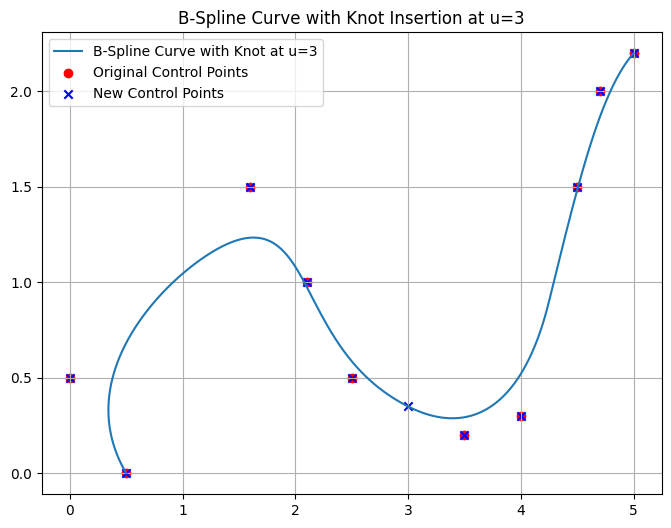

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

def insert_knot(knots, control_points, u, k):
    # 找到插入位置
    i = np.searchsorted(knots, u)

    # 插入节点
    new_knots = np.insert(knots, i, u)

    # 计算新的控制点
    new_control_points = np.zeros((control_points.shape[0] + 1, control_points.shape[1]))
    new_control_points[:i-k] = control_points[:i-k]
    new_control_points[i-k+1:] = control_points[i-k:]

    for j in range(i-k, i):
        alpha = (u - knots[j]) / (knots[j+k] - knots[j])
        new_control_points[j] = (1.0 - alpha) * control_points[j-1] + alpha * control_points[j]

    return new_knots, new_control_points

# 控制点和节点矢量
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],
                           [3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7, 2], [5, 2.2]])
knots = np.array([0, 0, 0, 0, 1, 2, 3, 3, 4, 4, 5, 5, 5, 5])
k = 3  # B 样条的阶数

# 插入节点 u=3
u = 3
new_knots, new_control_points = insert_knot(knots, control_points, u, k)

# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with Knot at u=3")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Knot Insertion at u=3')
plt.legend()
plt.grid(True)
plt.savefig('HW5_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 插入u=2两次

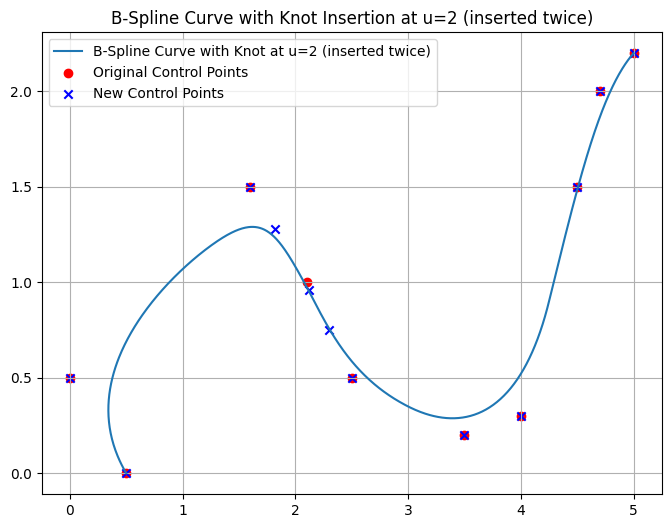

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

def insert_knot(knots, control_points, u, k, times=1):
    new_knots = knots
    new_control_points = control_points

    for _ in range(times):
        # 找到插入位置
        i = np.searchsorted(new_knots, u)

        # 插入节点
        new_knots = np.insert(new_knots, i, u)

        # 计算新的控制点
        new_control_points = np.zeros((new_control_points.shape[0] + 1, new_control_points.shape[1]))
        new_control_points[:i-k] = control_points[:i-k]
        new_control_points[i-k+1:] = control_points[i-k:]

        for j in range(i-k, i):
            alpha = (u - knots[j]) / (knots[j+k] - knots[j])
            new_control_points[j] = (1.0 - alpha) * control_points[j-1] + alpha * control_points[j]

        control_points = new_control_points

    return new_knots, new_control_points

# 控制点和节点矢量
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],
                           [3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7, 2], [5, 2.2]])
knots = np.array([0, 0, 0, 0, 1, 2, 3, 3, 4, 4, 5, 5, 5, 5])
k = 3  # B 样条的阶数

# 插入节点 u=2 两次
u = 2
new_knots, new_control_points = insert_knot(knots, control_points, u, k, times=2)

# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with Knot at u=2 (inserted twice)")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Knot Insertion at u=2 (inserted twice)')
plt.legend()
plt.grid(True)
plt.savefig('HW5_3.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 提取Bezier段

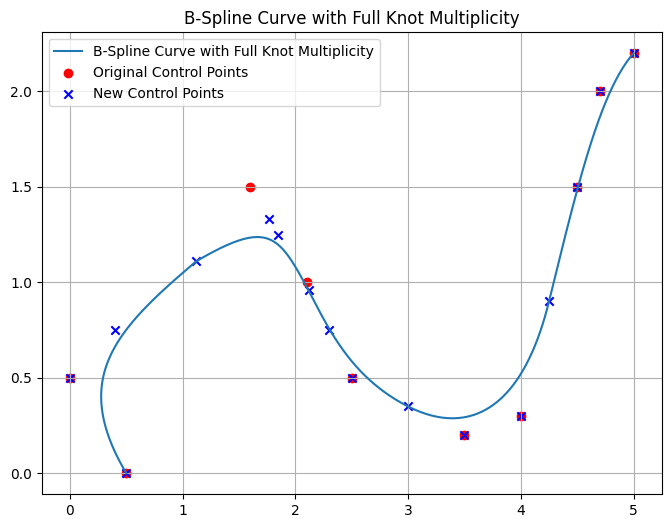

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

def insert_knot_to_multiplicity(knots, control_points, k):
    unique_knots, counts = np.unique(knots, return_counts=True)
    new_knots = knots.copy()
    new_control_points = control_points.copy()

    for knot, count in zip(unique_knots, counts):
        times_to_insert = k - count
        if times_to_insert > 0:
            new_knots, new_control_points = insert_knot(new_knots, new_control_points, knot, k, times=times_to_insert)

    return new_knots, new_control_points

def insert_knot(knots, control_points, u, k, times=1):
    new_knots = knots
    new_control_points = control_points

    for _ in range(times):
        i = np.searchsorted(new_knots, u)
        new_knots = np.insert(new_knots, i, u)
        new_control_points = np.zeros((new_control_points.shape[0] + 1, new_control_points.shape[1]))
        new_control_points[:i-k] = control_points[:i-k]
        new_control_points[i-k+1:] = control_points[i-k:]

        for j in range(i-k, i):
            alpha = (u - knots[j]) / (knots[j+k] - knots[j])
            new_control_points[j] = (1.0 - alpha) * control_points[j-1] + alpha * control_points[j]

        control_points = new_control_points

    return new_knots, new_control_points

# 控制点和节点矢量
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],
                           [3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7, 2], [5, 2.2]])
knots = np.array([0, 0, 0, 0, 1, 2, 3, 3, 4, 4, 5, 5, 5, 5])
k = 3  # B 样条的阶数

# 将每个节点插入到 p 重
new_knots, new_control_points = insert_knot_to_multiplicity(knots, control_points, k)

# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with Full Knot Multiplicity")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Full Knot Multiplicity')
plt.legend()
plt.grid(True)
plt.savefig('HW5_4.pdf', dpi=300, bbox_inches='tight')
plt.show()